In [2]:
%matplotlib inline
import numpy as np
from scipy import signal, fftpack
from matplotlib import pyplot as plt

In [8]:
# step 1.  Create all real freq axis
freq_axis = np.linspace(0,5125,524288)

# step 2. Define frequency of interest in same units as above, in the IF TO XCVR RANGE (aka 0 to 5125GHz) (nominally our 0.700GHz - 4700GHz)
# THIS IS WHERE THE TONE WOULD BE AT THE INPUT TO THE ADC
freq_of_interest = 1750

# step 3. Pretend you're an ADC and downconvert it
freq_of_interest = freq_of_interest - 2750

# step 4. Adjust freq of interest to match real spectrum
freq_of_interest_adjust = freq_of_interest + Fs/2

# step 5. Figure out how many bins it takes to get there
number_of_bins = freq_of_interest_adjust * N/Fs

# step 6. Floor that guy
number_of_bins = np.round(number_of_bins)

# step 7. this is the index into the complex, shifted FFT data
print(number_of_bins)

159844.0


In [12]:
# Let's test it out
t = np.arange(524288)
sig_in = np.cos(2*np.pi*(freq_of_interest)/Fs*t) + 1j*np.sin(2*np.pi*(freq_of_interest)/Fs*t)
sig_fft = fftpack.fftshift(fftpack.fft(sig_in))
sig_fft_db = 20*np.log10(np.abs(sig_fft))
bin_max = np.argmax(sig_fft_db, axis=0)
print(bin_max)

159844


Text(0.5,1,'Graph relative to MHz at IF')

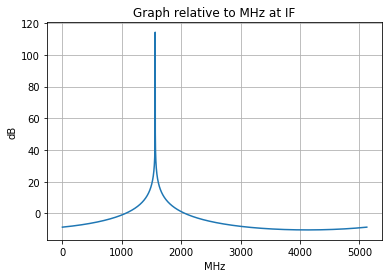

In [14]:
freq_axis = np.linspace(0,5125,524288)
plt.plot(freq_axis, sig_fft_db)
plt.grid(True)
plt.xlabel('MHz')
plt.ylabel('dB')
plt.title('Graph relative to MHz at IF')

Text(0.5,1,'graph relative to fft index')

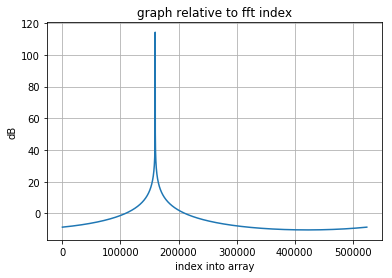

In [15]:

plt.plot(sig_fft_db)
plt.grid(True)
plt.xlabel('index into array')
plt.ylabel('dB')
plt.title('graph relative to fft index')